In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Partie 1

## Question 1 : la proportion de personnes en état de sous-nutrition

### Etape 1 : Importation des données de sous-nutrition et population

In [585]:
sous_nutrition = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 4/sous_nutrition.csv', sep=',')
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [586]:
population = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 4/population.csv', sep=',')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


### Etape 2 : Conversion des années en Int et calcul de l'année moyenne

In [587]:
annees = sous_nutrition.Année.str.split(pat='-',expand=True)
annees.columns = ['Début', 'Fin']
annees.head()

,Début,Fin
0,2012,2014
1,2013,2015
2,2014,2016
3,2015,2017
4,2016,2018


In [588]:
annees = annees.astype(int)
annees.dtypes

Début    int64
Fin      int64
dtype: object

In [589]:
annees['Année moyenne']= annees.mean(axis=1)
annees.head()

,Début,Fin,Année moyenne
0,2012,2014,2013.0
1,2013,2015,2014.0
2,2014,2016,2015.0
3,2015,2017,2016.0
4,2016,2018,2017.0


In [590]:
sous_nutrition = pd.concat([sous_nutrition,annees], axis = 1)
sous_nutrition.head()

,Zone,Année,Valeur,Début,Fin,Année moyenne
0,Afghanistan,2012-2014,8.6,2012,2014,2013.0
1,Afghanistan,2013-2015,8.8,2013,2015,2014.0
2,Afghanistan,2014-2016,8.9,2014,2016,2015.0
3,Afghanistan,2015-2017,9.7,2015,2017,2016.0
4,Afghanistan,2016-2018,10.5,2016,2018,2017.0


### Etape 3 : Remplacement des valeur <0.1 par des 0 pour convertir la variable Valeur en Int

In [591]:
sous_nutrition.loc[sous_nutrition['Valeur'] == '<0.1','Valeur'] = '0'

In [592]:
sous_nutrition = sous_nutrition.astype({'Valeur': float})

### Etape 4 : Extraction des sommes des valeurs pour l'année 2017 et calcul de la proportion mondiale de sous-nutrition

In [593]:
sous_nutrition['Valeur'].loc[sous_nutrition['Année moyenne']==2017].sum()

535.7

In [594]:
print('Le nombre de personnes en sous-nutrition en 2017 est de', sous_nutrition['Valeur'].loc[sous_nutrition['Année moyenne']==2017].sum(), "millions d'habitants")

Le nombre de personnes en sous-nutrition en 2017 est de 535.7 millions d'habitants


In [595]:
population['Valeur'].loc[population['Année']==2017].sum()

7548134.1110000005

In [596]:
print("Le taux de sous-nutrition en 2017 était de",round((((sous_nutrition['Valeur'].loc[sous_nutrition['Année moyenne']==2017].sum()*1000000)/(population['Valeur'].loc[population['Année']==2017].sum()*1000))*100),2),"% de la population mondiale")

Le taux de sous-nutrition en 2017 était de 7.1 % de la population mondiale


## Question 2 : le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale


### Etape 1 : J'importe mes deux fichiers et uniformise le nom des pays

In [597]:
dispo_alim = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 4/dispo_alimentaire.csv', sep=',')


In [ ]:
dispo_alim['Zone'][dispo_alim['Zone'] == "Tchéquie (la)"] = "Tchéquie"

In [599]:
dispo_alim[dispo_alim['Zone'] == "Tchéquie"]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13665,Tchéquie,Abats Comestible,animale,NaN,NaN,10.0,3.07,0.29,1.53,33.0,10.0,23.0,33.0,NaN,20.0,NaN,NaN,NaN
13666,Tchéquie,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.29,0.00,0.00,3.0,0.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
13667,Tchéquie,"Alcool, non Comestible",vegetale,NaN,14.0,NaN,NaN,NaN,NaN,14.0,33.0,12.0,NaN,NaN,35.0,NaN,NaN,0.0
13668,Tchéquie,Aliments pour enfants,vegetale,NaN,NaN,8.0,0.78,0.06,0.33,8.0,1.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
13669,Tchéquie,Ananas,vegetale,NaN,NaN,2.0,1.42,0.01,0.01,16.0,3.0,19.0,15.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,Tchéquie,Viande de Suides,animale,NaN,NaN,178.0,41.17,14.64,10.60,441.0,101.0,299.0,441.0,NaN,243.0,NaN,0.0,0.0
13755,Tchéquie,Viande de Volailles,animale,NaN,NaN,71.0,19.09,4.78,6.48,204.0,50.0,101.0,204.0,NaN,153.0,NaN,0.0,NaN
13756,Tchéquie,"Viande, Autre",animale,NaN,NaN,13.0,4.06,0.54,1.95,44.0,19.0,23.0,43.0,NaN,40.0,NaN,NaN,0.0
13757,Tchéquie,Vin,vegetale,NaN,NaN,18.0,9.17,NaN,0.00,160.0,30.0,142.0,98.0,NaN,49.0,NaN,62.0,0.0


In [600]:
pop = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 4/population.csv', sep=',')


In [ ]:
pop['Zone'][pop['Zone'] == "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"] = "Royaume-Uni"

In [602]:
pop[pop['Zone'] == "Royaume-Uni"]

,Zone,Année,Valeur
1110,Royaume-Uni,2013,64984.018
1111,Royaume-Uni,2014,65423.047
1112,Royaume-Uni,2015,65860.146
1113,Royaume-Uni,2016,66297.944
1114,Royaume-Uni,2017,66727.461
1115,Royaume-Uni,2018,67141.684


In [603]:
pop.rename(columns = {'Valeur':'Population'}, inplace = True)
pop.head()

,Zone,Année,Population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


### Etape 2 : Je calcule les productions réelles en multipliant la disponibilité par la population totale du pays

In [604]:
#Je fais une jointure externe entre ma table de dispo alimentaire et ma population de l'année 2017 avec la Zone comme clé commune
production_reelle = pd.merge(pop[pop['Année']==2017 ],dispo_alim, how='outer')
production_reelle.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296.113,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2017,36296.113,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2017,36296.113,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [605]:
#J'ajoute la colonne "Production réelle" qui est la disponibilité alimentaire du pays x la population du pays en question
production_reelle['Production réelle (Kcal/jour)'] = production_reelle['Disponibilité alimentaire (Kcal/personne/jour)']*production_reelle['Population']*1000
production_reelle[['Zone','Population','Disponibilité alimentaire (Kcal/personne/jour)','Production réelle (Kcal/jour)']]

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour),Production réelle (Kcal/jour)
0,Afghanistan,36296.113,5.0,181480565.0
1,Afghanistan,36296.113,1.0,36296113.0
2,Afghanistan,36296.113,1.0,36296113.0
3,Afghanistan,36296.113,0.0,0.0
4,Afghanistan,36296.113,4.0,145184452.0
...,...,...,...,...
15662,Zimbabwe,14236.595,24.0,341678280.0
15663,Zimbabwe,14236.595,17.0,242022115.0
15664,Zimbabwe,14236.595,7.0,99656165.0
15665,Zimbabwe,14236.595,1.0,14236595.0


### Etape 3 : J'ajoute ma variable de besoin calorique quotidien puis je calcule la somme de la production de tous les pays et en déduis le nombre théorique de personnes pouvant être nourries

In [606]:
besoin_calorique = 2285

https://atlantico.fr/article/decryptage/le-nombre-de-calories-necessaires-a-la-population-mondiale-devrait-augmenter-de-80-d-ici-la-fin-du-siecle-saurons-nous-relever-le-defi--imc-demographie-catherine-grangeard-beatrice-de-reynal-jean-louis-lambert


In [607]:
print('Il serait théoriquement possible de nourrir',round(production_reelle['Production réelle (Kcal/jour)'].sum()/(besoin_calorique*1000000),2),"millions de personnes avec la production alimentaire mondiale")

Il serait théoriquement possible de nourrir 9270.09 millions de personnes avec la production alimentaire mondiale


## Question 3 : idem pour la disponibilité alimentaire des produits végétaux

In [608]:
production_reelle

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Production réelle (Kcal/jour)
0,Afghanistan,2017,36296.113,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,...,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,181480565.0
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,...,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,36296113.0
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,36296113.0
3,Afghanistan,2017,36296.113,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,Afghanistan,2017,36296.113,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,...,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15662,Zimbabwe,2017,14236.595,Viande de Suides,animale,NaN,NaN,24.0,2.65,2.25,...,37.0,0.0,6.0,37.0,NaN,32.0,NaN,0.0,0.0,341678280.0
15663,Zimbabwe,2017,14236.595,Viande de Volailles,animale,NaN,NaN,17.0,4.97,1.05,...,70.0,0.0,6.0,70.0,NaN,64.0,NaN,NaN,NaN,242022115.0
15664,Zimbabwe,2017,14236.595,"Viande, Autre",animale,NaN,1.0,7.0,2.29,0.21,...,34.0,3.0,1.0,32.0,NaN,36.0,NaN,0.0,NaN,99656165.0
15665,Zimbabwe,2017,14236.595,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,...,4.0,0.0,2.0,4.0,NaN,2.0,NaN,NaN,0.0,14236595.0


In [609]:
print('Il serait théoriquement possible de nourrir',round((production_reelle['Production réelle (Kcal/jour)'].loc[production_reelle['Origine']=='vegetale'].sum())/(besoin_calorique*1000000),2),"millions de personnes avec la production alimentaire vegetale mondiale")

Il serait théoriquement possible de nourrir 7636.55 millions de personnes avec la production alimentaire vegetale mondiale


## Question 4 : l'utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine

### Etape 1 : Calcul de l'utilisation de la disponibilité intérieure

In [610]:
production_reelle_zero = production_reelle.fillna(0)
production_reelle_zero.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Production réelle (Kcal/jour)
0,Afghanistan,2017,36296.113,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296.113,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296.113,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,145184452.0


In [611]:
print("La proportion de la disponibilité intérieure utilisée pour l'alimentation humaine est de",round(((production_reelle_zero['Nourriture'].sum()/production_reelle_zero['Disponibilité intérieure'].sum())*100),2),"%")

La proportion de la disponibilité intérieure utilisée pour l'alimentation humaine est de 49.51 %


In [612]:
print("La proportion de la disponibilité intérieure utilisée perdue est de",round(((production_reelle_zero['Pertes'].sum()/production_reelle_zero['Disponibilité intérieure'].sum())*100),2),"%")

La proportion de la disponibilité intérieure utilisée perdue est de 4.61 %


In [613]:
print("La proportion de la disponibilité intérieure utilisée pour l'alimentation animale est de",round(((production_reelle_zero['Aliments pour animaux'].sum()/production_reelle_zero['Disponibilité intérieure'].sum())*100),2),"%")

La proportion de la disponibilité intérieure utilisée pour l'alimentation animale est de 13.24 %


### Etape 2 : Représentation graphique de l'utilisation de la disponibilité intérieure

In [614]:
utilisation =[(production_reelle_zero['Pertes'].sum()),(production_reelle_zero['Aliments pour animaux'].sum()),(production_reelle_zero['Nourriture'].sum()),(production_reelle_zero['Traitement'].sum()),(production_reelle_zero['Semences'].sum()),(production_reelle_zero['Autres Utilisations'].sum())]
disponibilité = pd.DataFrame(utilisation, index = ['Pertes', 'Aliments pour animaux', 'Nourriture','Traitement','Semences','Autres Utilisations'], columns = ['Utilisation'])
disponibilité['Type'] = ['Pertes', 'Aliments pour animaux', 'Nourriture','Traitement','Semences','Autres Utilisations']
disponibilité['%'] = (disponibilité['Utilisation']/disponibilité['Utilisation'].sum())*100

In [615]:
disponibilité = disponibilité.sort_values('%', ascending=False)
disponibilité.reset_index()
disponibilité


,Utilisation,Type,%
Nourriture,4876258.0,Nourriture,49.462012
Traitement,2204687.0,Traitement,22.363102
Aliments pour animaux,1304245.0,Aliments pour animaux,13.229526
Autres Utilisations,865023.0,Autres Utilisations,8.774306
Pertes,453698.0,Pertes,4.602057
Semences,154681.0,Semences,1.568997


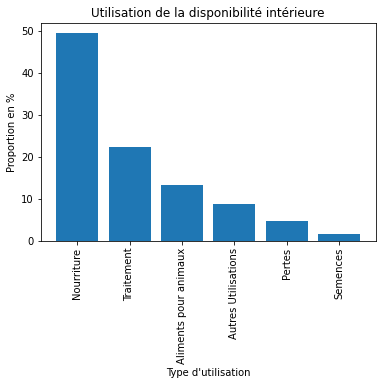

In [616]:
plt.bar(height=disponibilité['%'], x = disponibilité['Type'])
plt.xticks(disponibilité['Type'],rotation = 90)
plt.xlabel("Type d'utilisation")
plt.ylabel('Proportion en %')
plt.title("Utilisation de la disponibilité intérieure")
plt.show()

# Partie 2

In [617]:
sous_nutrition = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 4/sous_nutrition.csv', sep=',')

In [618]:
sous_nutrition[['Début','Fin']] = sous_nutrition.Année.str.split(pat='-',expand=True)
sous_nutrition[['Début','Fin']] = sous_nutrition[['Début','Fin']].astype(int)
sous_nutrition['Année moyenne'] = (sous_nutrition['Début']+sous_nutrition['Fin'])/2
sous_nutrition.head()

,Zone,Année,Valeur,Début,Fin,Année moyenne
0,Afghanistan,2012-2014,8.6,2012,2014,2013.0
1,Afghanistan,2013-2015,8.8,2013,2015,2014.0
2,Afghanistan,2014-2016,8.9,2014,2016,2015.0
3,Afghanistan,2015-2017,9.7,2015,2017,2016.0
4,Afghanistan,2016-2018,10.5,2016,2018,2017.0


In [619]:
sous_nutrition.loc[sous_nutrition['Valeur'] == '<0.1','Valeur'] = '0'
sous_nutrition = sous_nutrition.astype({'Valeur': float})


In [620]:
dispo_alimentaire = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 4/dispo_alimentaire.csv', sep=',')
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dispo_alimentaire['Zone'][dispo_alimentaire['Zone'] == "Tchéquie (la)"] = "Tchéquie"


In [622]:
aide_alimentaire = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 4/aide_alimentaire.csv', sep=',')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [623]:
population = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 4/population.csv', sep=',')
population.rename(columns = {'Valeur':'Population'}, inplace = True)
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [ ]:
population['Zone'][population['Zone'] == "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"] = "Royaume-Uni"

## Question 1 : les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

### Etape 1 : Vérification du type des colonnes et jonction des tableaux sous_nutrition et population uniquement pour l'année 2017

In [625]:
sous_nutrition.dtypes

Zone              object
Année             object
Valeur           float64
Début              int64
Fin                int64
Année moyenne    float64
dtype: object

In [626]:
population[population['Année']==2017 ].dtypes

Zone           object
Année           int64
Population    float64
dtype: object

In [627]:
sous_nutrition_pop2017 = pd.merge(population[population['Année']==2017 ],sous_nutrition[sous_nutrition['Année moyenne']== 2017],left_on='Zone', right_on='Zone', how='outer')
sous_nutrition_pop2017

,Zone,Année_x,Population,Année_y,Valeur,Début,Fin,Année moyenne
0,Afghanistan,2017.0,36296.113,2016-2018,10.5,2016.0,2018.0,2017.0
1,Afrique du Sud,2017.0,57009.756,2016-2018,3.1,2016.0,2018.0,2017.0
2,Albanie,2017.0,2884.169,2016-2018,0.1,2016.0,2018.0,2017.0
3,Algérie,2017.0,41389.189,2016-2018,1.3,2016.0,2018.0,2017.0
4,Allemagne,2017.0,82658.409,2016-2018,NaN,2016.0,2018.0,2017.0
...,...,...,...,...,...,...,...,...
232,Viet Nam,2017.0,94600.648,2016-2018,6.5,2016.0,2018.0,2017.0
233,Yémen,2017.0,27834.819,2016-2018,NaN,2016.0,2018.0,2017.0
234,Zambie,2017.0,16853.599,2016-2018,NaN,2016.0,2018.0,2017.0
235,Zimbabwe,2017.0,14236.595,2016-2018,NaN,2016.0,2018.0,2017.0


### Etape 2 : Calcul de la proportion de la population en état de sous-nutrition dans chaque pays

In [628]:
sous_nutrition_pop2017['Proportion sous-nutrition'] = ((sous_nutrition_pop2017['Valeur']*1000000)/(sous_nutrition_pop2017['Population']*1000))*100
sous_nutrition_pop2017

,Zone,Année_x,Population,Année_y,Valeur,Début,Fin,Année moyenne,Proportion sous-nutrition
0,Afghanistan,2017.0,36296.113,2016-2018,10.5,2016.0,2018.0,2017.0,28.928718
1,Afrique du Sud,2017.0,57009.756,2016-2018,3.1,2016.0,2018.0,2017.0,5.437666
2,Albanie,2017.0,2884.169,2016-2018,0.1,2016.0,2018.0,2017.0,3.467203
3,Algérie,2017.0,41389.189,2016-2018,1.3,2016.0,2018.0,2017.0,3.140917
4,Allemagne,2017.0,82658.409,2016-2018,NaN,2016.0,2018.0,2017.0,NaN
...,...,...,...,...,...,...,...,...,...
232,Viet Nam,2017.0,94600.648,2016-2018,6.5,2016.0,2018.0,2017.0,6.870989
233,Yémen,2017.0,27834.819,2016-2018,NaN,2016.0,2018.0,2017.0,NaN
234,Zambie,2017.0,16853.599,2016-2018,NaN,2016.0,2018.0,2017.0,NaN
235,Zimbabwe,2017.0,14236.595,2016-2018,NaN,2016.0,2018.0,2017.0,NaN


### Etape 3 : Tri des proportion de sous-nutrition de la plus élevée à la plus faible et extraction des 10 pays les plus sous-nutris

In [629]:
sous_nutrition_pop2017.sort_values('Proportion sous-nutrition', ascending = False)

,Zone,Année_x,Population,Année_y,Valeur,Début,Fin,Année moyenne,Proportion sous-nutrition
87,Haïti,2017.0,10982.366,2016-2018,5.3,2016.0,2018.0,2017.0,48.259182
181,République populaire démocratique de Corée,2017.0,25429.825,2016-2018,12.0,2016.0,2018.0,2017.0,47.188685
128,Madagascar,2017.0,25570.512,2016-2018,10.5,2016.0,2018.0,2017.0,41.062924
122,Libéria,2017.0,4702.226,2016-2018,1.8,2016.0,2018.0,2017.0,38.279742
119,Lesotho,2017.0,2091.534,2016-2018,0.8,2016.0,2018.0,2017.0,38.249438
...,...,...,...,...,...,...,...,...,...
229,Uruguay,2017.0,3436.641,2016-2018,NaN,2016.0,2018.0,2017.0,NaN
233,Yémen,2017.0,27834.819,2016-2018,NaN,2016.0,2018.0,2017.0,NaN
234,Zambie,2017.0,16853.599,2016-2018,NaN,2016.0,2018.0,2017.0,NaN
235,Zimbabwe,2017.0,14236.595,2016-2018,NaN,2016.0,2018.0,2017.0,NaN


In [630]:
sous_nutrition_pop2017.nlargest(10,['Proportion sous-nutrition'])

,Zone,Année_x,Population,Année_y,Valeur,Début,Fin,Année moyenne,Proportion sous-nutrition
87,Haïti,2017.0,10982.366,2016-2018,5.3,2016.0,2018.0,2017.0,48.259182
181,République populaire démocratique de Corée,2017.0,25429.825,2016-2018,12.0,2016.0,2018.0,2017.0,47.188685
128,Madagascar,2017.0,25570.512,2016-2018,10.5,2016.0,2018.0,2017.0,41.062924
122,Libéria,2017.0,4702.226,2016-2018,1.8,2016.0,2018.0,2017.0,38.279742
119,Lesotho,2017.0,2091.534,2016-2018,0.8,2016.0,2018.0,2017.0,38.249438
216,Tchad,2017.0,15016.753,2016-2018,5.7,2016.0,2018.0,2017.0,37.957606
186,Rwanda,2017.0,11980.961,2016-2018,4.2,2016.0,2018.0,2017.0,35.055619
145,Mozambique,2017.0,28649.018,2016-2018,9.4,2016.0,2018.0,2017.0,32.810898
219,Timor-Leste,2017.0,1243.258,2016-2018,0.4,2016.0,2018.0,2017.0,32.173531
0,Afghanistan,2017.0,36296.113,2016-2018,10.5,2016.0,2018.0,2017.0,28.928718


## Question 2 : les pays qui ont le plus bénéficié d’aide depuis 2013

### Etape 1 : Verification de la table et des différentes années qu'elle contient

In [631]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [632]:
pd.unique(aide_alimentaire['Année'])

array([2013, 2014, 2015, 2016])

### Etape 2 : Agrégation des sommes des aides alimentaires par pays sur les années 2013 à 2016

In [633]:
aide_alimentaire_pays = aide_alimentaire.groupby('Pays bénéficiaire')['Valeur'].sum('Valeur')
aide_alimentaire_pays = aide_alimentaire_pays.reset_index()
aide_alimentaire_pays.head()

,Pays bénéficiaire,Valeur
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666


### Etape 3 : Tri des aides alimentaires et extraction des 10 pays ayant bénéficié du plus d'aides depuis 2013

In [634]:
aide_alimentaire_pays.sort_values('Valeur', ascending = False)

,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
...,...,...
73,Égypte,1122
69,Vanuatu,802
67,Timor-Leste,116
24,Géorgie,70


In [635]:
aide_alimentaire_pays.nlargest(10,'Valeur')

,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


## Question 3 : les pays ayant le plus/le moins de disponibilité/habitant

In [636]:
dispo_alimentaire_pays = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum('Disponibilité alimentaire (Kcal/personne/jour)')
dispo_alimentaire_pays = dispo_alimentaire_pays.reset_index()
dispo_alimentaire_pays

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


In [637]:
dispo_alimentaire_pays[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
...,...,...
74,Israël,3610.0
171,États-Unis d'Amérique,3682.0
159,Turquie,3708.0
16,Belgique,3737.0


In [638]:
dispo_alimentaire_pays[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
...,...,...
65,Haïti,2089.0
0,Afghanistan,2087.0
91,Madagascar,2056.0
166,Zambie,1924.0


## Evolution du nombre de personnes en sous-nutrition dans le monde



In [639]:
sous_nutrition_années = pd.DataFrame ({'Année' : [2013, 2014, 2015, 2016 ,2017, 2018], "Sous-nutrition (en millions d'habitants)" : [sous_nutrition_pop['Valeur'].loc[sous_nutrition_pop['Année moyenne']==2013].sum(),sous_nutrition_pop['Valeur'].loc[sous_nutrition_pop['Année moyenne']==2014].sum(),sous_nutrition_pop['Valeur'].loc[sous_nutrition_pop['Année moyenne']==2015].sum(),sous_nutrition_pop['Valeur'].loc[sous_nutrition_pop['Année moyenne']==2016].sum(),sous_nutrition_pop['Valeur'].loc[sous_nutrition_pop['Année moyenne']==2017].sum(),sous_nutrition_pop['Valeur'].loc[sous_nutrition_pop['Année moyenne']==2018].sum()]}) 
sous_nutrition_années

,Année,Sous-nutrition (en millions d'habitants)
0,2013,528.1
1,2014,523.5
2,2015,524.7
3,2016,528.6
4,2017,535.7
5,2018,544.2


In [640]:
sous_nutrition_années['Population'] = [sous_nutrition_pop['Population'].loc[sous_nutrition_pop['Année moyenne']==2013].sum(),sous_nutrition_pop['Population'].loc[sous_nutrition_pop['Année moyenne']==2014].sum(),sous_nutrition_pop['Population'].loc[sous_nutrition_pop['Année moyenne']==2015].sum(),sous_nutrition_pop['Population'].loc[sous_nutrition_pop['Année moyenne']==2016].sum(),sous_nutrition_pop['Population'].loc[sous_nutrition_pop['Année moyenne']==2017].sum(),sous_nutrition_pop['Population'].loc[sous_nutrition_pop['Année moyenne']==2018].sum()]
sous_nutrition_années

,Année,Sous-nutrition (en millions d'habitants),Population
0,2013,528.1,7206670.140
1,2014,523.5,7291346.928
2,2015,524.7,7375818.210
3,2016,528.6,7460004.222
4,2017,535.7,7543798.779
5,2018,544.2,7626986.351


In [641]:
sous_nutrition_années['Taux sous-nutrition mondial'] = ((sous_nutrition_années["Sous-nutrition (en millions d'habitants)"]*1000000)/(sous_nutrition_années['Population']*1000))*100
sous_nutrition_années

,Année,Sous-nutrition (en millions d'habitants),Population,Taux sous-nutrition mondial
0,2013,528.1,7206670.140,7.327934
1,2014,523.5,7291346.928,7.179743
2,2015,524.7,7375818.210,7.113787
3,2016,528.6,7460004.222,7.085787
4,2017,535.7,7543798.779,7.101197
5,2018,544.2,7626986.351,7.135190


Text(0.5, 0, 'Année')

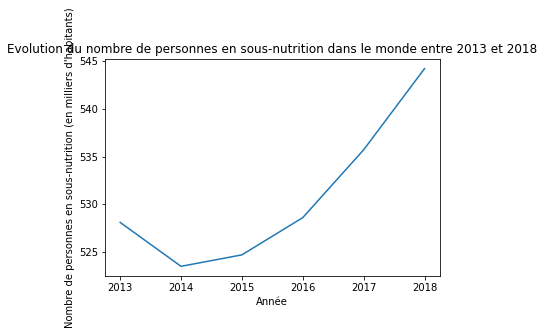

In [642]:
plt.plot(sous_nutrition_années['Année'], sous_nutrition_années["Sous-nutrition (en millions d'habitants)"])
plt.title("Evolution du nombre de personnes en sous-nutrition dans le monde entre 2013 et 2018")
plt.ylabel("Nombre de personnes en sous-nutrition (en milliers d'habitants)")
plt.xlabel("Année")

## Evolution du taux de sous-nutrition par pays

In [ ]:
sous_nutrition['Zone'][sous_nutrition['Zone'] == "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"] = "Royaume-Uni"

In [644]:
sous_nutrition['Année moyenne'] = sous_nutrition['Année moyenne'].astype(int)
sous_nutrition.dtypes

Zone              object
Année             object
Valeur           float64
Début              int64
Fin                int64
Année moyenne      int64
dtype: object

In [645]:
pd.unique(sous_nutrition['Année moyenne'])

array([2013, 2014, 2015, 2016, 2017, 2018])

In [646]:
pd.unique(population['Année'])

array([2013, 2014, 2015, 2016, 2017, 2018])

In [647]:
sous_nutrition.shape

(1218, 6)

In [648]:
population.shape

(1416, 3)

In [649]:
sous_nutrition_pop = pd.merge(population,sous_nutrition,left_on=['Zone','Année'], right_on=['Zone','Année moyenne'], how='outer')
sous_nutrition_pop['% sous-nutrition'] = ((sous_nutrition_pop['Valeur']*1000000)/(sous_nutrition_pop['Population']*1000))*100
sous_nutrition_pop

,Zone,Année_x,Population,Année_y,Valeur,Début,Fin,Année moyenne,% sous-nutrition
0,Afghanistan,2013,32269.589,2012-2014,8.6,2012.0,2014.0,2013.0,26.650479
1,Afghanistan,2014,33370.794,2013-2015,8.8,2013.0,2015.0,2014.0,26.370364
2,Afghanistan,2015,34413.603,2014-2016,8.9,2014.0,2016.0,2015.0,25.861866
3,Afghanistan,2016,35383.032,2015-2017,9.7,2015.0,2017.0,2016.0,27.414270
4,Afghanistan,2017,36296.113,2016-2018,10.5,2016.0,2018.0,2017.0,28.928718
...,...,...,...,...,...,...,...,...,...
1411,Zimbabwe,2014,13586.707,2013-2015,NaN,2013.0,2015.0,2014.0,NaN
1412,Zimbabwe,2015,13814.629,2014-2016,NaN,2014.0,2016.0,2015.0,NaN
1413,Zimbabwe,2016,14030.331,2015-2017,NaN,2015.0,2017.0,2016.0,NaN
1414,Zimbabwe,2017,14236.595,2016-2018,NaN,2016.0,2018.0,2017.0,NaN


In [650]:
evolution_sous_nutrition = pd.pivot_table(sous_nutrition_pop, values = '% sous-nutrition', index = 'Zone', columns=['Année moyenne'])
evolution_sous_nutrition.reset_index()
evolution_sous_nutrition

Année moyenne,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
Zone,,,,,,
Afghanistan,26.650479,26.370364,25.861866,27.414270,28.928718,29.861249
Afrique du Sud,4.097817,4.583440,5.055396,5.337352,5.437666,5.710082
Albanie,3.443775,3.452675,3.459594,3.464478,3.467203,3.468922
Algérie,3.408483,3.339868,3.272249,3.205809,3.140917,2.841689
Angola,29.213038,23.012586,19.007056,19.415800,19.452143,18.500615
...,...,...,...,...,...,...
Égypte,4.977114,4.755340,4.543362,4.764573,4.769677,4.673676
Émirats arabes unis,3.261611,3.255853,3.238727,3.204793,3.162154,3.114955
Équateur,14.642711,11.910852,8.635568,9.095806,8.936358,8.779961


In [651]:
evolution_sous_nutrition['Evolution entre 2013 et 2018'] = evolution_sous_nutrition[2018]-evolution_sous_nutrition[2013]
evolution_sous_nutrition

Année moyenne,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,Evolution entre 2013 et 2018
Zone,,,,,,,
Afghanistan,26.650479,26.370364,25.861866,27.414270,28.928718,29.861249,3.210770
Afrique du Sud,4.097817,4.583440,5.055396,5.337352,5.437666,5.710082,1.612265
Albanie,3.443775,3.452675,3.459594,3.464478,3.467203,3.468922,0.025147
Algérie,3.408483,3.339868,3.272249,3.205809,3.140917,2.841689,-0.566794
Angola,29.213038,23.012586,19.007056,19.415800,19.452143,18.500615,-10.712423
...,...,...,...,...,...,...,...
Égypte,4.977114,4.755340,4.543362,4.764573,4.769677,4.673676,-0.303438
Émirats arabes unis,3.261611,3.255853,3.238727,3.204793,3.162154,3.114955,-0.146656
Équateur,14.642711,11.910852,8.635568,9.095806,8.936358,8.779961,-5.862750


In [652]:
evolution_sous_nutrition.sort_values('Evolution entre 2013 et 2018', ascending = False)

Année moyenne,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,Evolution entre 2013 et 2018
Zone,,,,,,,
Venezuela (République bolivarienne du),4.700978,8.654271,13.961917,20.769646,27.208586,31.501931,26.800954
Lesotho,14.789034,24.468483,38.853416,38.553659,38.249438,33.201665,18.412631
Cabo Verde,0.000000,0.000000,0.000000,0.000000,0.000000,18.390230,18.390230
Rwanda,25.898258,29.773639,34.303594,35.136351,35.055619,35.766629,9.868371
Mozambique,23.082260,26.629952,31.062789,33.057925,32.810898,32.546782,9.464521
...,...,...,...,...,...,...,...
Angola,29.213038,23.012586,19.007056,19.415800,19.452143,18.500615,-10.712423
Kazakhstan,2.936665,NaN,NaN,NaN,NaN,NaN,NaN
Samoa,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [653]:
evolution_sous_nutrition.sort_values('Evolution entre 2013 et 2018', ascending = True)

Année moyenne,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,Evolution entre 2013 et 2018
Zone,,,,,,,
Angola,29.213038,23.012586,19.007056,19.415800,19.452143,18.500615,-10.712423
Éthiopie,27.467401,24.772090,21.520208,20.559159,19.830841,19.684244,-7.783158
Namibie,22.386309,17.594614,12.959501,12.722409,12.486301,16.337860,-6.048448
Liban,11.838278,9.583066,6.123063,5.957451,5.865642,5.831407,-6.006871
Sierra Leone,32.051371,29.926688,27.886559,27.289471,26.707893,26.143278,-5.908093
...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),4.700978,8.654271,13.961917,20.769646,27.208586,31.501931,26.800954
Kazakhstan,2.936665,NaN,NaN,NaN,NaN,NaN,NaN
Samoa,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
